In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pip install pyTDC

^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install rdkit-pypi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.7 MB 1.6 MB/s 


In [84]:
import requests
from tdc import utils
names = utils.retrieve_benchmark_names('ADMET_Group')
from tdc.benchmark_group import admet_group
group = admet_group(path = 'data/')

Found local copy...


In [85]:
benchmark = group.get('dili')

In [86]:
name = benchmark['name']
train_val, test = benchmark['train_val'], benchmark['test']
#Spliting the data
train, valid = group.get_train_valid_split(benchmark = name, split_type = 'scaffold',seed=2)

generating training, validation splits...
100%|██████████| 379/379 [00:00<00:00, 3088.76it/s]


In [87]:
print(train.shape)
train.head(3)

(331, 3)


,Drug_ID,Drug,Y
0,3821.0,CNC1(c2ccccc2Cl)CCCCC1=O,0.0
1,54678501.0,O=C1OC(C(O)CO)C(O)=C1O,0.0
2,4601.0,Cc1ccccc1C(OCCN(C)C)c1ccccc1,0.0


In [88]:
print(test.shape)
test.head(3)

(96, 3)


,Drug_ID,Drug,Y
0,443884.0,CC(CO)NC(=O)C1C=C2c3cccc4[nH]cc(c34)CC2N(C)C1,0.0
1,9681.0,CCC(CO)NC(=O)C1C=C2c3cccc4c3c(cn4C)CC2N(C)C1,0.0
2,8226.0,CCC(CO)NC(=O)C1C=C2c3cccc4[nH]cc(c34)CC2N(C)C1,0.0


In [90]:
test.to_csv('testinitial2.csv', index=False)

In [91]:
print(valid.shape)
valid.head(3)

(48, 3)


,Drug_ID,Drug,Y
0,5509.0,Cc1ccc(C(=O)c2ccc(CC(=O)O)n2C)cc1,1.0
1,4046.0,OC(c1cc(C(F)(F)F)nc2c(C(F)(F)F)cccc12)C1CCCCN1,0.0
2,126941.0,CN(Cc1cnc2nc(N)nc(N)c2n1)c1ccc(C(=O)NC(CCC(=O)...,1.0


In [92]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

TRAIN

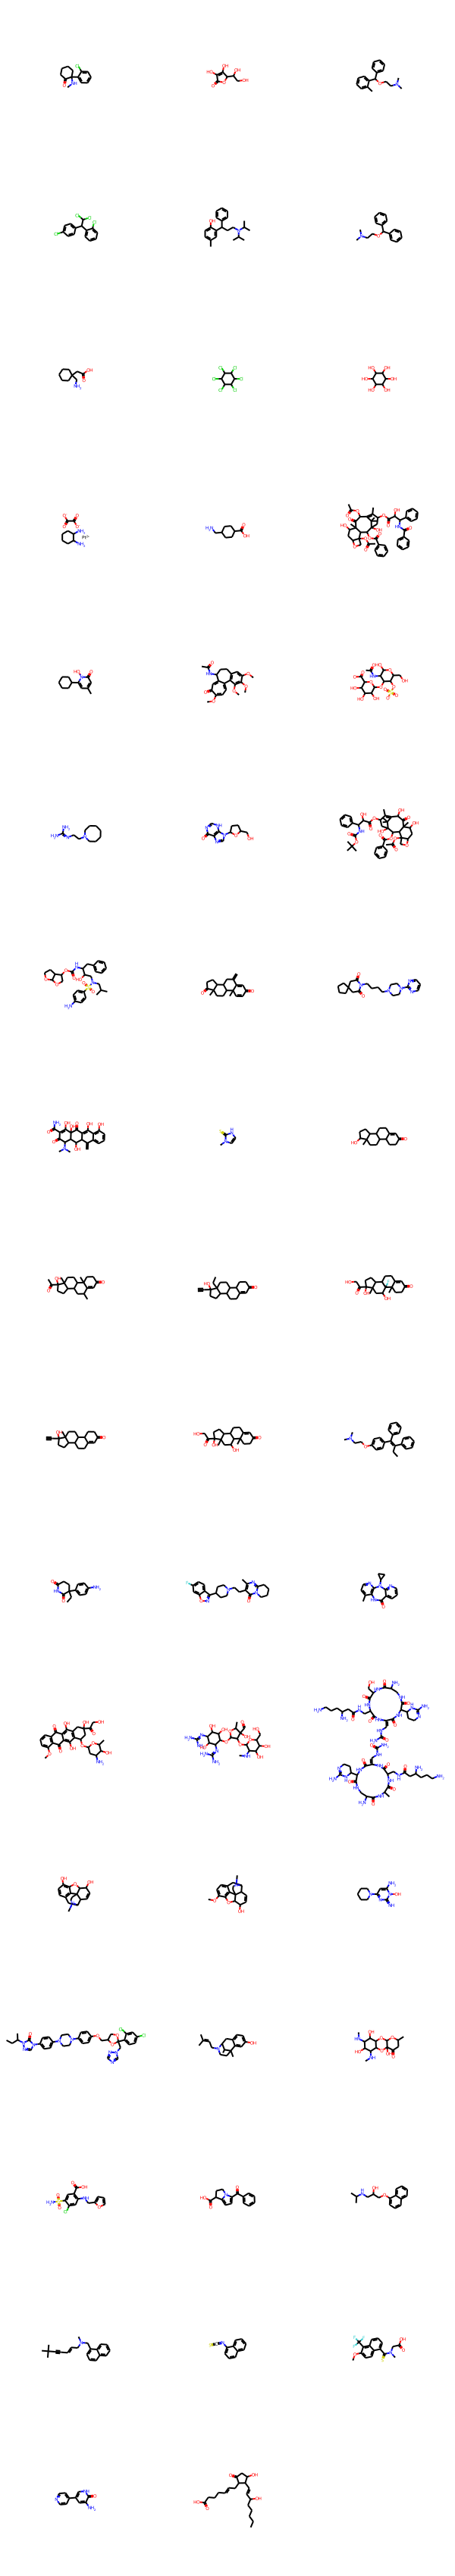

In [93]:
smiles_list=train.Drug

mol_list1=[]
for smiles in smiles_list:
    mol= Chem.MolFromSmiles(smiles)
    mol_list1.append(mol)

img = Draw.MolsToGridImage(mol_list1)    
img

In [94]:
finger_print_list = []
length_list=[]

for compound in mol_list1 :
    finger_print=AllChem.GetMorganFingerprintAsBitVect(compound,2,nBits=1024)
    fp_arr1=np.zeros((1,))
    DataStructs.ConvertToNumpyArray(finger_print,fp_arr1)
    fp2=np.resize(fp_arr1, 1024)
    finger_print_list.append(np.asarray(fp2).astype(np.float32))
    
train["finger_prints"] = finger_print_list

In [95]:
train

,Drug_ID,Drug,Y,finger_prints
0,3821.0,CNC1(c2ccccc2Cl)CCCCC1=O,0.0,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
1,54678501.0,O=C1OC(C(O)CO)C(O)=C1O,0.0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,4601.0,Cc1ccccc1C(OCCN(C)C)c1ccccc1,0.0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,4211.0,Clc1ccc(C(c2ccccc2Cl)C(Cl)Cl)cc1,0.0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,60774.0,Cc1ccc(O)c(C(CCN(C(C)C)C(C)C)c2ccccc2)c1,0.0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...
326,4912.0,CC(C)(Sc1cc(C(C)(C)C)c(O)c(C(C)(C)C)c1)Sc1cc(C...,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
327,5284594.0,C=C1CCC2(O)C3Cc4ccc(O)c5c4C2(CCN3CC2CC2)C1O5,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
328,5591.0,Cc1c(C)c2c(c(C)c1O)CCC(C)(COc1ccc(CC3SC(=O)NC3...,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
329,104865.0,COc1ccccc1Oc1c(NS(=O)(=O)c2ccc(C(C)(C)C)cc2)nc...,1.0,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."


In [50]:
train.to_csv('trainingfingerprint.csv', index=False)

In [96]:
train_x=train.finger_prints

In [97]:
train_x = np.array([np.array(val) for val in train_x])
train_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [98]:
train_y=np.array(train.Y)
train_y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1.

In [99]:
train_x = np.asarray(train_x).astype(np.float32)
train_y = np.asarray(train_y).astype(np.float32)
train_dataset = tf.data.Dataset.from_tensor_slices((train_x, train_y))

TEST

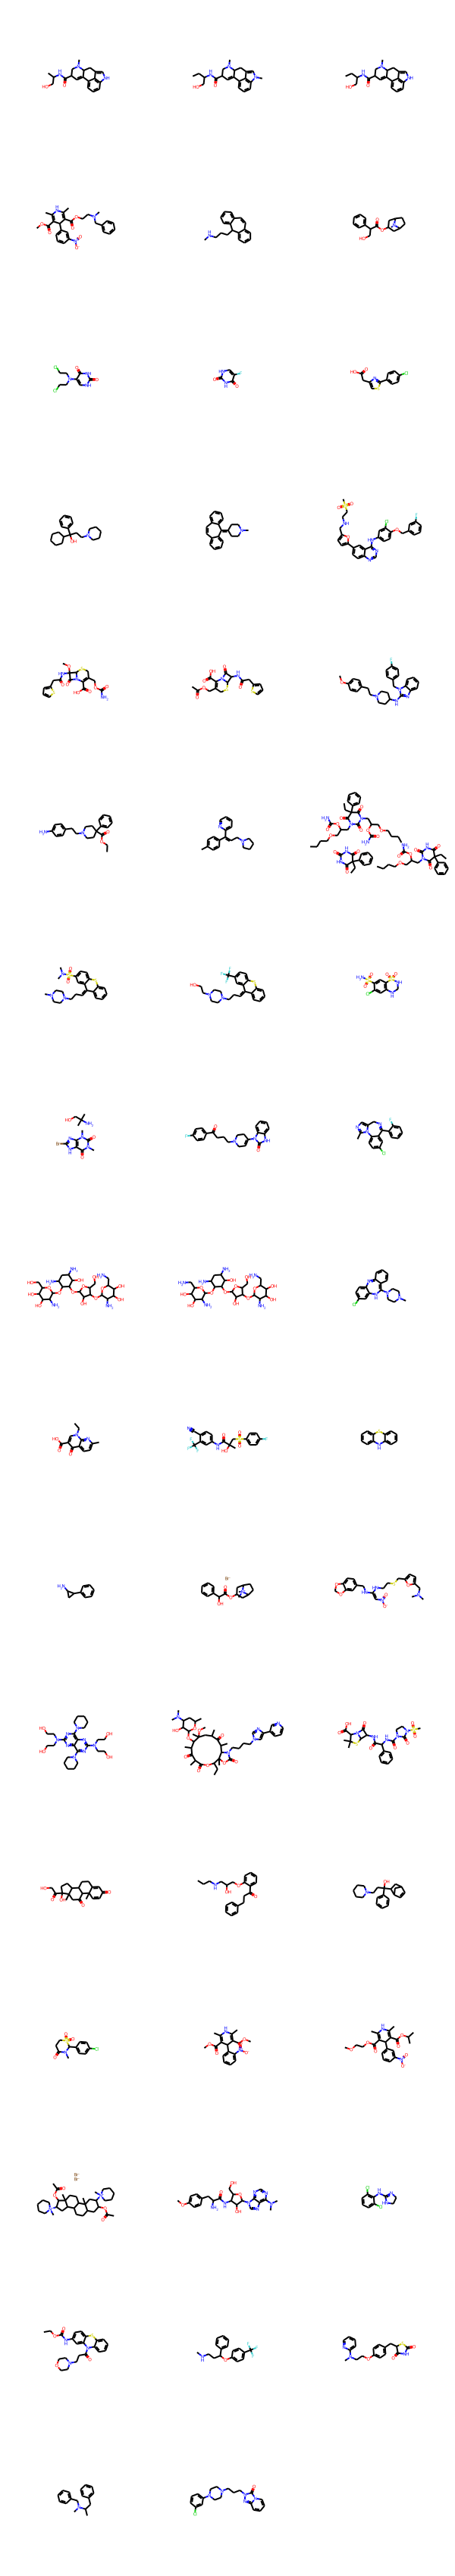

In [100]:
smiles_list=test.Drug

mol_list2=[]
for smiles in smiles_list:
    mol= Chem.MolFromSmiles(smiles)
    mol_list2.append(mol)

img = Draw.MolsToGridImage(mol_list2)    
img

In [101]:
finger_print_list = []
length_list=[]
for compound in mol_list2 :
    finger_print=AllChem.GetMorganFingerprintAsBitVect(compound,2,nBits=1024)
    fp_arr2=np.zeros((1,))
    DataStructs.ConvertToNumpyArray(finger_print,fp_arr2)
    fp3=np.resize(fp_arr2, 1024)
    finger_print_list.append(np.asarray(fp3).astype(np.float32))
    
test["finger_prints"] = finger_print_list

In [102]:
test

,Drug_ID,Drug,Y,finger_prints
0,443884.0,CC(CO)NC(=O)C1C=C2c3cccc4[nH]cc(c34)CC2N(C)C1,0.0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,9681.0,CCC(CO)NC(=O)C1C=C2c3cccc4c3c(cn4C)CC2N(C)C1,0.0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,8226.0,CCC(CO)NC(=O)C1C=C2c3cccc4[nH]cc(c34)CC2N(C)C1,0.0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,4474.0,COC(=O)C1=C(C)NC(C)=C(C(=O)OCCN(C)Cc2ccccc2)C1...,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,4976.0,CNCCCC1c2ccccc2C=Cc2ccccc21,0.0,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...
91,3724.0,CC(=O)N(CC(O)CN(C(C)=O)c1c(I)c(C(=O)NCC(O)CO)c...,0.0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
92,4917.0,CN1CCN(CCCN2c3ccccc3Sc3ccc(Cl)cc32)CC1,1.0,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
93,5291.0,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
94,5717.0,COc1cc(C(=O)NS(=O)(=O)c2ccccc2C)ccc1Cc1cn(C)c2...,1.0,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."


In [103]:
test_x=test.finger_prints

In [104]:
test_x = np.array([np.array(val) for val in test_x])
test_x

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [105]:
test_y=np.array(test.Y)
test_y

array([0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1.])

In [106]:
test_x = np.asarray(test_x).astype(np.float32)
test_y = np.asarray(test_y).astype(np.float32)
test_dataset = tf.data.Dataset.from_tensor_slices((test_x, test_y))

valid

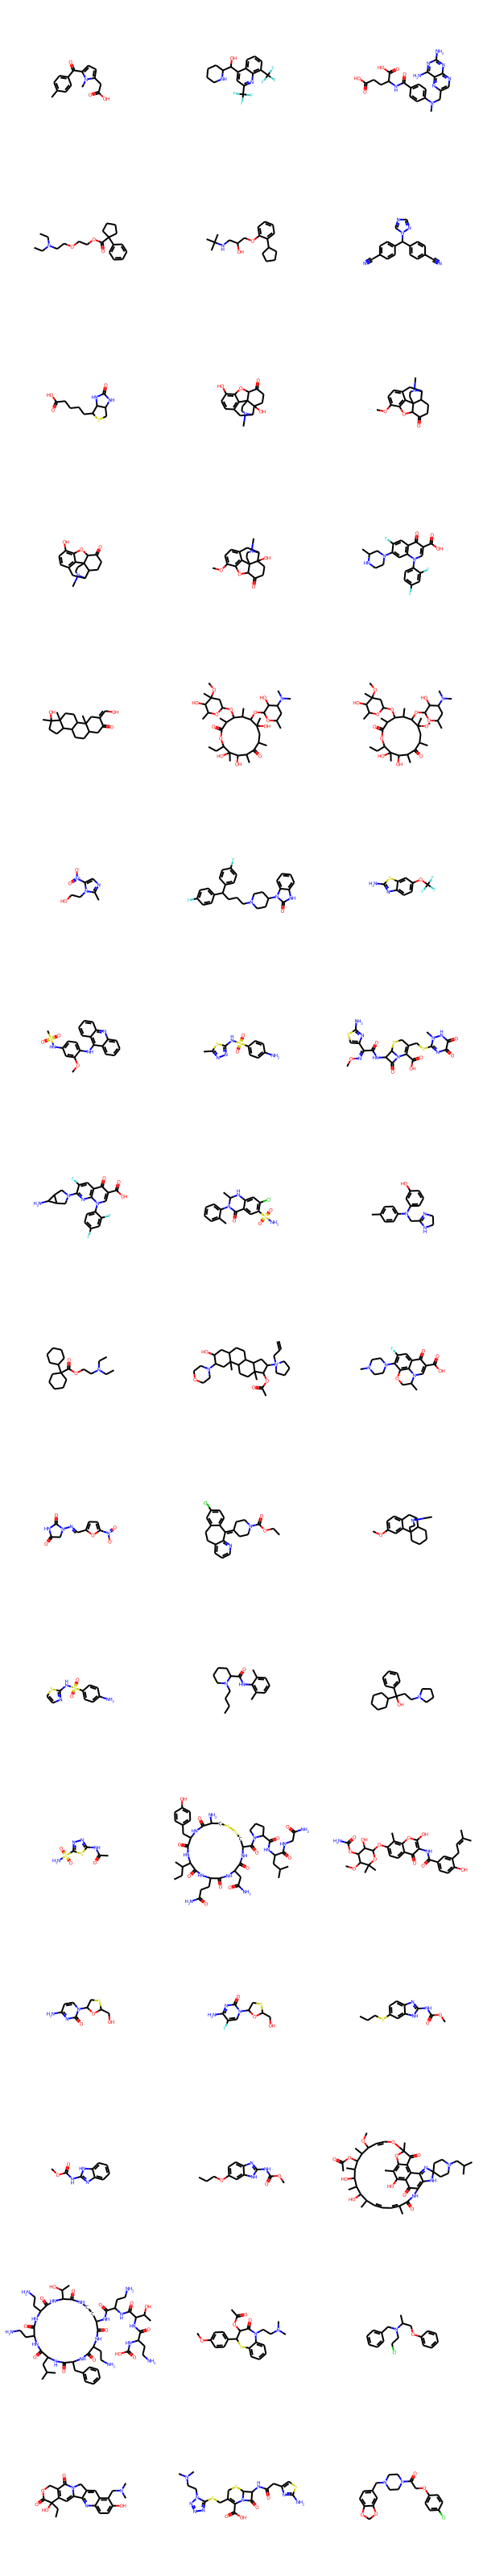

In [107]:
smiles_list=valid.Drug

mol_list3=[]
for smiles in smiles_list:
    mol= Chem.MolFromSmiles(smiles)
    mol_list3.append(mol)

img = Draw.MolsToGridImage(mol_list3)    
img

In [108]:
finger_print_list = []
length_list=[]
for compound in mol_list3 :
    finger_print=AllChem.GetMorganFingerprintAsBitVect(compound,2,nBits=1024)
    fp_arr3=np.zeros((1,))
    DataStructs.ConvertToNumpyArray(finger_print,fp_arr3)
    fp4=np.resize(fp_arr3, 1024)
    finger_print_list.append(np.asarray(fp4).astype(np.float32))
    
valid["finger_prints"] = finger_print_list

In [109]:
valid

,Drug_ID,Drug,Y,finger_prints
0,5509.0,Cc1ccc(C(=O)c2ccc(CC(=O)O)n2C)cc1,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,4046.0,OC(c1cc(C(F)(F)F)nc2c(C(F)(F)F)cccc12)C1CCCCN1,0.0,"[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
2,126941.0,CN(Cc1cnc2nc(N)nc(N)c2n1)c1ccc(C(=O)NC(CCC(=O)...,1.0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,2562.0,CCN(CC)CCOCCOC(=O)C1(c2ccccc2)CCCC1,0.0,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
4,37464.0,CC(C)(C)NCC(O)COc1ccccc1C1CCCC1,0.0,"[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
5,3902.0,N#Cc1ccc(C(c2ccc(C#N)cc2)n2cncn2)cc1,1.0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,171548.0,O=C(O)CCCCC1SCC2NC(=O)NC21,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,5284604.0,CN1CCC23c4c5ccc(O)c4OC2C(=O)CCC3(O)C1C5,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,5284569.0,COc1ccc2c3c1OC1C(=O)CCC4C(C2)N(C)CCC314,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,5284570.0,CN1CCC23c4c5ccc(O)c4OC2C(=O)CCC3C1C5,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [110]:
valid_x=valid.finger_prints

In [111]:
valid_x = np.array([np.array(val) for val in valid_x])
valid_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [112]:
valid_y=np.array(valid.Y)
valid_y

array([1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1.])

In [113]:
valid_x = np.asarray(valid_x).astype(np.float32)
valid_y = np.asarray(valid_y).astype(np.float32)
valid_dataset = tf.data.Dataset.from_tensor_slices((valid_x, valid_y))

In [114]:
from keras.models import Sequential
from keras.layers import Dense

In [39]:
classifier= Sequential()
classifier.add(Dense(units = 1024, activation= 'relu', input_dim=1024))
# classifier.add(Dense(units = 256, activation= 'relu'))
# classifier.add(Dense(units = 64, activation= 'relu'))
classifier.add(Dense(units = 16, activation= 'relu'))
classifier.add(Dense(units = 1, activation= 'sigmoid'))

classifier.compile(
        optimizer = "sgd", 
        loss = "binary_crossentropy", 
        metrics = ["accuracy"]
    )

classifier.summary()
    


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 16)                16400     
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,066,017
Trainable params: 1,066,017
Non-trainable params: 0
_________________________________________________________________


In [68]:
callback = tf.keras.callbacks.EarlyStopping(
                monitor = "val_loss",
                patience = 25, 
                verbose = 1, 
                mode = "auto",
                baseline = None, 
                restore_best_weights = True
            )

history = classifier.fit(
                train_x, train_y,
                batch_size = 10,
                verbose = 1,
                epochs = 100,
                validation_data = (valid_x, valid_y),
                callbacks = [callback],
            )


   

Epoch 1/100
34/34 [==============================] - 0s 7ms/step - loss: 0.0212 - accuracy: 1.0000 - val_loss: 0.5707 - val_accuracy: 0.7917
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 0.0204 - accuracy: 1.0000 - val_loss: 0.5723 - val_accuracy: 0.7917
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 0.0197 - accuracy: 1.0000 - val_loss: 0.5885 - val_accuracy: 0.7917
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 0.0191 - accuracy: 1.0000 - val_loss: 0.5864 - val_accuracy: 0.7917
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 0.0185 - accuracy: 1.0000 - val_loss: 0.5850 - val_accuracy: 0.7917
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 0.0178 - accuracy: 1.0000 - val_loss: 0.5850 - val_accuracy: 0.7917
Epoch 7/100
34/34 [==============================] - 0s 6ms/step - loss: 0.0173 - accuracy: 1.0000 - val_loss: 0.5888 - val_accuracy: 0.7917
Epoch 8/100
3

In [70]:


history = classifier.fit(
                train_x, train_y,
                batch_size = 10,
                verbose = 1,
                epochs = 100,
                validation_data = (valid_x, valid_y),
            )


   

Epoch 1/100
34/34 [==============================] - 0s 5ms/step - loss: 0.0204 - accuracy: 1.0000 - val_loss: 0.5696 - val_accuracy: 0.7917
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 0.0197 - accuracy: 1.0000 - val_loss: 0.5805 - val_accuracy: 0.7917
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 0.0191 - accuracy: 1.0000 - val_loss: 0.5744 - val_accuracy: 0.7917
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 0.0185 - accuracy: 1.0000 - val_loss: 0.5838 - val_accuracy: 0.7917
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 0.0178 - accuracy: 1.0000 - val_loss: 0.5855 - val_accuracy: 0.7917
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 0.0173 - accuracy: 1.0000 - val_loss: 0.5921 - val_accuracy: 0.7917
Epoch 7/100
34/34 [==============================] - 0s 6ms/step - loss: 0.0168 - accuracy: 1.0000 - val_loss: 0.5874 - val_accuracy: 0.7917
Epoch 8/100
3

Epoch 59/100
34/34 [==============================] - 0s 5ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.7145 - val_accuracy: 0.7917
Epoch 60/100
34/34 [==============================] - 0s 7ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.7142 - val_accuracy: 0.7917
Epoch 61/100
34/34 [==============================] - 0s 5ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.7164 - val_accuracy: 0.7917
Epoch 62/100
34/34 [==============================] - 0s 8ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.7146 - val_accuracy: 0.7917
Epoch 63/100
34/34 [==============================] - 0s 5ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.7156 - val_accuracy: 0.7917
Epoch 64/100
34/34 [==============================] - 0s 5ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.7190 - val_accuracy: 0.7917
Epoch 65/100
34/34 [==============================] - 0s 7ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.7217 - val_accuracy: 0.7917
Epoch 

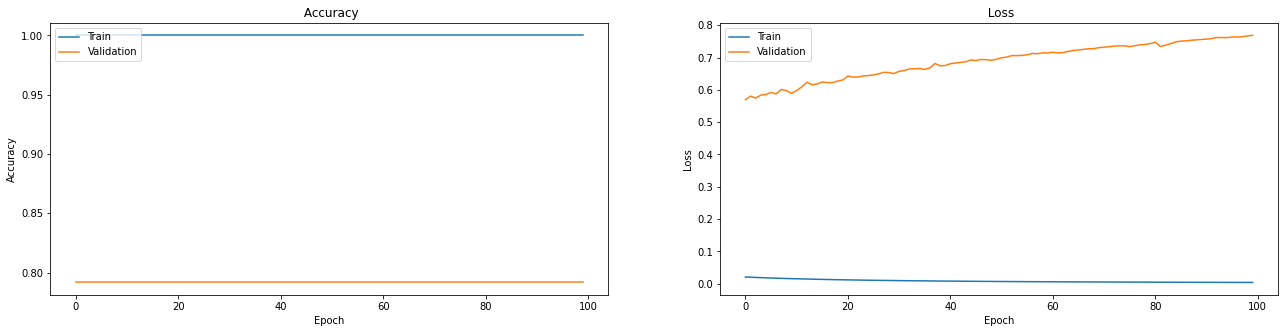

5/5 [==============================] - 0s 2ms/step - loss: 0.6346 - accuracy: 0.7917


[0.6345891356468201, 0.7916666865348816]

In [71]:
 ## Accuracy and Loss Plots

fig, axes = plt.subplots(1, 2, figsize = [22,5])
ax1,ax2 = axes.flatten()

ax1.plot(history.history["accuracy"])
ax1.plot(history.history["val_accuracy"])
ax1.set_title(" Accuracy")
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("Epoch")
ax1.legend(["Train", "Validation"], loc = "upper left")

ax2.plot(history.history["loss"])
ax2.plot(history.history["val_loss"])
ax2.set_title(" Loss")
ax2.set_ylabel("Loss")
ax2.set_xlabel("Epoch")
ax2.legend(["Train", "Validation"], loc = "upper left")

plt.show()
    
classifier.evaluate(
    test_x, test_y,
    batch_size = 20,
    verbose = 1
)

In [49]:
#import pickle

# Save the trained model as a pickle string.
#saved_model = pickle.dumps(classifier)

In [42]:
#classifier.save('new.pkl')

INFO:tensorflow:Assets written to: new.pkl\assets


In [46]:
#classifier.save('newmodel.h5')

In [ ]:
classifier.save('newmodel1.h5')

In [ ]:
                                        #CREATING NEW MODEL AND LOADING TRAINED MODEL INTO IT.

In [158]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('newmodel.h5')

# Show the model architecture
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 16)                16400     
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,066,017
Trainable params: 1,066,017
Non-trainable params: 0
_________________________________________________________________


In [159]:
# Use the loaded pickled model to make predictions
new_model.predict(test_x)


3/3 [==============================] - 0s 2ms/step


array([[0.17850533],
       [0.4748134 ],
       [0.21693723],
       [0.4735341 ],
       [0.3708957 ],
       [0.04422511],
       [0.60372305],
       [0.7741709 ],
       [0.8862786 ],
       [0.11265993],
       [0.55241436],
       [0.78357255],
       [0.3507505 ],
       [0.6295654 ],
       [0.45754957],
       [0.28149801],
       [0.33228073],
       [0.4635401 ],
       [0.6655611 ],
       [0.2649654 ],
       [0.7800385 ],
       [0.52221525],
       [0.6353773 ],
       [0.85617375],
       [0.11730561],
       [0.1271712 ],
       [0.58867663],
       [0.9628997 ],
       [0.8608572 ],
       [0.565146  ],
       [0.2692261 ],
       [0.17152865],
       [0.7422724 ],
       [0.32959417],
       [0.70936775],
       [0.5900353 ],
       [0.16777796],
       [0.11663931],
       [0.13945971],
       [0.57746965],
       [0.86934   ],
       [0.4603321 ],
       [0.25561056],
       [0.962396  ],
       [0.6087836 ],
       [0.7038392 ],
       [0.10741659],
       [0.631

In [160]:
print(test_x.shape)

(96, 1024)


In [161]:
print(valid_x.shape)

(48, 1024)


In [162]:
print(train_x.shape)

(331, 1024)


In [163]:
test_y

array([0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1.], dtype=float32)

In [164]:
df = pd.read_csv('selected.csv')
df

,Drug
0,OC1(CC(O)C(O)C(O)C1)C(=O)O
1,C\C(C)=C\CCC(C)CCO
2,Oc1cc(cc(O)c1O)C(=O)O
3,CC12CCC(CC1O)C2(C)C
4,Oc1cc2C=CC(=O)Oc2cc1O
5,C\C(C)=C\CCC(\C)=C\CO


In [165]:
print(df.shape)

(6, 1)


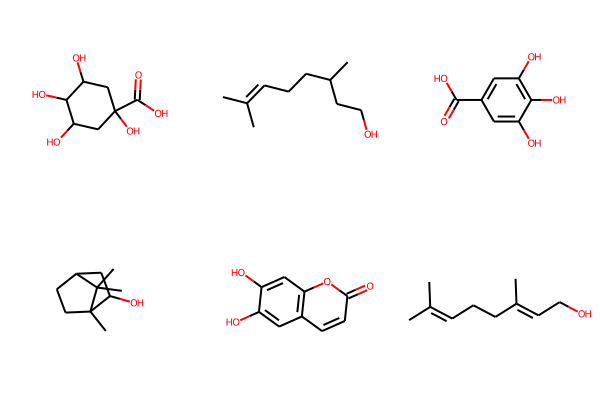

In [166]:
smiles_list=df.Drug

mol_list4=[]
for smiles in smiles_list:
    mol= Chem.MolFromSmiles(smiles)
    mol_list4.append(mol)

img = Draw.MolsToGridImage(mol_list4)    
img

In [167]:
finger_print_list = []
length_list=[]
for compound in mol_list4 :
    finger_print=AllChem.GetMorganFingerprintAsBitVect(compound,2,nBits=1024)
    fp_arr4=np.zeros((1,))
    DataStructs.ConvertToNumpyArray(finger_print,fp_arr4)
    fp5=np.resize(fp_arr4, 1024)
    finger_print_list.append(np.asarray(fp5).astype(np.float32))
    
df["finger_prints"] = finger_print_list

In [168]:
df

,Drug,finger_prints
0,OC1(CC(O)C(O)C(O)C1)C(=O)O,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,C\C(C)=C\CCC(C)CCO,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,Oc1cc(cc(O)c1O)C(=O)O,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,CC12CCC(CC1O)C2(C)C,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,Oc1cc2C=CC(=O)Oc2cc1O,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,C\C(C)=C\CCC(\C)=C\CO,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [169]:
check_x=df.finger_prints

In [170]:
checknew_x = np.array([np.array(val) for val in check_x])
checknew_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [171]:
outputtoxicity=new_model.predict(checknew_x)


1/1 [==============================] - 0s 37ms/step


In [172]:
outputtoxicity

array([[0.4124217 ],
       [0.10696954],
       [0.6952676 ],
       [0.11582812],
       [0.6403132 ],
       [0.1448573 ]], dtype=float32)

In [173]:
df1 = pd.DataFrame(outputtoxicity, columns = ['Toxicity'])
df1

,Toxicity
0,0.412422
1,0.106970
2,0.695268
3,0.115828
4,0.640313
5,0.144857


In [174]:
df2 = df.drop(columns='finger_prints')

In [175]:
df2

,Drug
0,OC1(CC(O)C(O)C(O)C1)C(=O)O
1,C\C(C)=C\CCC(C)CCO
2,Oc1cc(cc(O)c1O)C(=O)O
3,CC12CCC(CC1O)C2(C)C
4,Oc1cc2C=CC(=O)Oc2cc1O
5,C\C(C)=C\CCC(\C)=C\CO


In [176]:
final_output = pd.concat([df2,df1], axis=1)
final_output

,Drug,Toxicity
0,OC1(CC(O)C(O)C(O)C1)C(=O)O,0.412422
1,C\C(C)=C\CCC(C)CCO,0.106970
2,Oc1cc(cc(O)c1O)C(=O)O,0.695268
3,CC12CCC(CC1O)C2(C)C,0.115828
4,Oc1cc2C=CC(=O)Oc2cc1O,0.640313
5,C\C(C)=C\CCC(\C)=C\CO,0.144857


In [177]:
#Declare a list that is to be converted into a column
name = ['Quinic acid', 'Beta citronellol', 'Gallicacid', ' Borneol','Esculetin',' Geraniol']

# Using 'Address' as the column name
# and equating it to the list
final_output['Name of compound'] = name

# Observe the result
final_output


,Drug,Toxicity,Name of compound
0,OC1(CC(O)C(O)C(O)C1)C(=O)O,0.412422,Quinic acid
1,C\C(C)=C\CCC(C)CCO,0.106970,Beta citronellol
2,Oc1cc(cc(O)c1O)C(=O)O,0.695268,Gallicacid
3,CC12CCC(CC1O)C2(C)C,0.115828,Borneol
4,Oc1cc2C=CC(=O)Oc2cc1O,0.640313,Esculetin
5,C\C(C)=C\CCC(\C)=C\CO,0.144857,Geraniol


In [178]:
# altering the DataFrame
final_new = final_output[['Name of compound', 'Drug', 'Toxicity']]

In [180]:
final_new

final_new.columns = final_new.columns.str.replace('Drug', 'SMILES notation')

In [181]:
final_new

,Name of compound,SMILES notation,Toxicity
0,Quinic acid,OC1(CC(O)C(O)C(O)C1)C(=O)O,0.412422
1,Beta citronellol,C\C(C)=C\CCC(C)CCO,0.106970
2,Gallicacid,Oc1cc(cc(O)c1O)C(=O)O,0.695268
3,Borneol,CC12CCC(CC1O)C2(C)C,0.115828
4,Esculetin,Oc1cc2C=CC(=O)Oc2cc1O,0.640313
5,Geraniol,C\C(C)=C\CCC(\C)=C\CO,0.144857


In [185]:
#predict whether it can cause liver injury near (1) or low value (0).
#low value=OK

In [183]:
#Borneol

In [184]:
final_new.to_csv('output.csv', index=False)